In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

In [2]:
os.listdir('result/ins_seg')

['2011_002872.npy',
 '2007_002234.npy',
 '2007_008072.npy',
 '2011_000542.npy',
 '2010_000404.npy',
 '2010_004363.npy',
 '2009_002416.npy',
 '2009_000895.npy',
 '2008_000716.npy',
 '2008_007165.npy',
 '2008_002079.npy',
 '2008_006070.npy',
 '2008_001408.npy',
 '2010_003097.npy',
 '2008_007998.npy',
 '2010_004499.npy',
 '2010_003017.npy',
 '2007_006803.npy',
 '2009_004643.npy',
 '2008_004914.npy',
 '2009_001755.npy',
 '2009_000535.npy',
 '2009_003768.npy',
 '2010_005506.npy',
 '2011_000840.npy',
 '2009_002789.npy',
 '2011_000642.npy',
 '2009_004888.npy',
 '2011_001211.npy',
 '2008_001399.npy',
 '2009_003497.npy',
 '2011_002553.npy',
 '2009_002519.npy',
 '2007_003529.npy',
 '2007_006661.npy',
 '2008_006751.npy',
 '2009_000029.npy',
 '2009_000987.npy',
 '2009_001664.npy',
 '2010_004478.npy',
 '2008_000711.npy',
 '2007_009901.npy',
 '2008_003998.npy',
 '2009_004186.npy',
 '2010_002107.npy',
 '2010_000117.npy',
 '2007_003815.npy',
 '2011_002561.npy',
 '2009_000285.npy',
 '2009_003147.npy',


In [20]:
os.listdir('data/VOCdevkit/VOC2012/JPEGImages')

['2009_000931.jpg',
 '2011_004735.jpg',
 '2008_006404.jpg',
 '2010_006202.jpg',
 '2008_001564.jpg',
 '2012_000304.jpg',
 '2009_002228.jpg',
 '2008_002791.jpg',
 '2009_004435.jpg',
 '2008_001544.jpg',
 '2008_002736.jpg',
 '2007_003506.jpg',
 '2010_002536.jpg',
 '2010_006875.jpg',
 '2012_002963.jpg',
 '2010_004042.jpg',
 '2012_002177.jpg',
 '2009_001608.jpg',
 '2010_001794.jpg',
 '2008_003997.jpg',
 '2009_001635.jpg',
 '2011_003609.jpg',
 '2009_003454.jpg',
 '2007_008403.jpg',
 '2010_001579.jpg',
 '2008_002227.jpg',
 '2009_003187.jpg',
 '2011_000934.jpg',
 '2012_002722.jpg',
 '2008_004020.jpg',
 '2011_004435.jpg',
 '2010_005930.jpg',
 '2010_006342.jpg',
 '2012_003330.jpg',
 '2011_004581.jpg',
 '2008_007043.jpg',
 '2012_003277.jpg',
 '2010_002455.jpg',
 '2008_000602.jpg',
 '2012_001677.jpg',
 '2010_004714.jpg',
 '2008_000045.jpg',
 '2010_004211.jpg',
 '2010_002752.jpg',
 '2011_004844.jpg',
 '2009_000085.jpg',
 '2011_006331.jpg',
 '2009_000074.jpg',
 '2010_004712.jpg',
 '2011_001167.jpg',


In [26]:
os.listdir('data/VOCdevkit/VOC2012/Annotations')

['2008_005660.xml',
 '2009_003068.xml',
 '2011_004546.xml',
 '2011_004632.xml',
 '2010_002439.xml',
 '2011_002478.xml',
 '2010_002624.xml',
 '2009_003816.xml',
 '2009_004984.xml',
 '2011_006748.xml',
 '2009_002438.xml',
 '2008_001941.xml',
 '2009_001618.xml',
 '2010_004448.xml',
 '2011_002590.xml',
 '2011_007112.xml',
 '2011_001062.xml',
 '2010_006841.xml',
 '2011_007211.xml',
 '2007_001149.xml',
 '2008_008313.xml',
 '2012_000548.xml',
 '2010_003725.xml',
 '2008_002817.xml',
 '2010_003493.xml',
 '2012_002187.xml',
 '2007_009084.xml',
 '2009_000681.xml',
 '2010_004095.xml',
 '2010_005906.xml',
 '2008_006130.xml',
 '2010_006063.xml',
 '2011_003012.xml',
 '2012_000849.xml',
 '2007_007836.xml',
 '2011_005492.xml',
 '2008_005779.xml',
 '2010_005141.xml',
 '2008_007521.xml',
 '2011_001122.xml',
 '2012_002657.xml',
 '2011_004044.xml',
 '2008_001415.xml',
 '2008_004075.xml',
 '2008_000901.xml',
 '2009_003857.xml',
 '2012_000375.xml',
 '2012_003938.xml',
 '2009_002377.xml',
 '2011_003644.xml',


In [25]:
labels = np.load('voc12/cls_labels.npy',allow_pickle=True).item()

In [27]:
type(labels)

dict

In [104]:
IMG_NAME = '2008_002697'
#200700
labels[int(IMG_NAME.replace('_',''))]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [105]:
instance = np.load(f'result/ins_seg/{IMG_NAME}.npy',allow_pickle=True).item()
image = cv2.imread(f'data/VOCdevkit/VOC2012/JPEGImages/{IMG_NAME}.jpg')

In [71]:
!cat data/VOCdevkit/VOC2012/Annotations/2011_002872.xml

<annotation>
	<filename>2011_002872.jpg</filename>
	<folder>VOC2012</folder>
	<object>
		<name>boat</name>
		<bndbox>
			<xmax>244</xmax>
			<xmin>168</xmin>
			<ymax>145</ymax>
			<ymin>53</ymin>
		</bndbox>
		<difficult>0</difficult>
		<occluded>0</occluded>
		<pose>Left</pose>
		<truncated>0</truncated>
	</object>
	<object>
		<name>boat</name>
		<bndbox>
			<xmax>392</xmax>
			<xmin>340</xmin>
			<ymax>144</ymax>
			<ymin>113</ymin>
		</bndbox>
		<difficult>0</difficult>
		<occluded>0</occluded>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
	</object>
	<object>
		<name>person</name>
		<bndbox>
			<xmax>321</xmax>
			<xmin>132</xmin>
			<ymax>375</ymax>
			<ymin>144</ymin>
		</bndbox>
		<difficult>0</difficult>
		<occluded>0</occluded>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
	</object>
	<segmented>1</segmented>
	<size>
		<depth>3</depth>
		<height>375</height>
		<width>500</width>
	</size>
	<source>
		<annotation>PASCAL VOC2011</annotation>
		<database>The VOC20

In [106]:
instance

{'score': array([0., 1., 0., 0.]),
 'mask': array([[[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]],
 
        [[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., Fal

In [107]:
vv = instance['mask'].transpose(1,2,0)*1.
mask = np.zeros(vv.shape[:2])
for i in range(1,vv.shape[-1]+1):
#for i in range(1,5):
    #print(i)
    true_points = np.argwhere(vv[:,:,i-1])
    top_left = true_points.min(axis=0)
    bottom_right = true_points.max(axis=0)
    cropped_arr = vv[:,:,i-1][top_left[0]:bottom_right[0]+1,top_left[1]:bottom_right[1]+1]
    AREA = cropped_arr.shape[0] * cropped_arr.shape[1]
    print(AREA)
    if AREA > 1000:
        mask = mask + vv[:,:,i-1]*i

56
38456
40
4


In [108]:
np.unique(mask)

array([0., 2.])

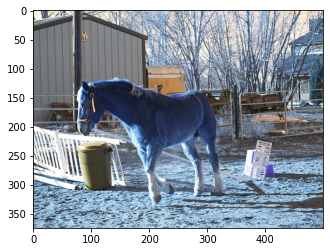

In [109]:
plt.imshow(image)